# Session 1: Introduction to Reproducible Research (75 mins) 

- Welcome + go over schedule (5 mins) 
 
- Lecture 1: Introduction to reproducible research (20 mins) 

- Activity 1: Is your research reproducible? (35 min)

- Follow-up of hands-on activity (15 mins)

# Preclass

Not required

# Lecture 1: Why do we need reproducibility

## Literature
- Problem with reproducibility 
- What is replication and reproduction.

## Practical examples
- Give example of research that is not reproducible.

# Exercise 1 - Reproducibility Motivation

## Part 1: Analyze + Document

Complete the following tasks and write instructions/documentation for your collaborator to reproduce your work:

1, Starting with the original dataset (data_TCS183.csv), visualise total traffic using a line plot.

2, Something is wrong with the raw data, please correct the error in the data and plot the total traffic for visualisation.

3, Using the original dataset: data_TrafficData.csv, create a scatter plot describing the total traffic flow and density. 

4, Add the right and left slopes of the flow vs density plot

In [19]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load the CSV file into a DataFrame, specifying the correct header row
file_path = 'data_TCS183.csv'  # replace with your actual .csv file name
df_1 = pd.read_csv(file_path, header=1)  # Use the second row (index 1) as header

# Display the first few rows of the DataFrame to confirm the correct header is used
print(df_1.head())

               Time  TcsNo               Approach det_1 det_2 det_3 det_4  \
0  11/06/2008 00:00    183  Approach 1 (det: 1-4)    11    11    14     4   
1  11/06/2008 00:05    183  Approach 1 (det: 1-4)    17    21    17     2   
2  11/06/2008 00:10    183  Approach 1 (det: 1-4)    11    11    14     4   
3  11/06/2008 00:15    183  Approach 1 (det: 1-4)    17    14    10     0   
4  11/06/2008 00:20    183  Approach 1 (det: 1-4)    23    17    18     3   

   Total  
0     40  
1     57  
2     40  
3     41  
4     61  


In [21]:
# Select the 'Time' and 'Total' columns to create a shorten dataframe, remove redundant columns
df_1_shorted = df_1[['Time', 'Total']]

# Display the first few rows of the new DataFrame to verify the result
print(df_1_shorted)

                  Time  Total
0     11/06/2008 00:00     40
1     11/06/2008 00:05     57
2     11/06/2008 00:10     40
3     11/06/2008 00:15     41
4     11/06/2008 00:20     61
...                ...    ...
6839  04/07/2008 23:35     72
6840  04/07/2008 23:40     95
6841  04/07/2008 23:45     82
6842  04/07/2008 23:50     86
6843  04/07/2008 23:55     72

[6844 rows x 2 columns]


In [22]:
# Create DataFrame
df_1_shorted_hour = pd.DataFrame(df_1_shorted)

# Convert 'Time' column to datetime
df_1_shorted_hour['Time'] = pd.to_datetime(df_1_shorted_hour['Time'], dayfirst = True)

# Set 'Time' as the index
df_1_shorted_hour.set_index('Time', inplace=True)
print(df_1_shorted_hour)

                     Total
Time                      
2008-06-11 00:00:00     40
2008-06-11 00:05:00     57
2008-06-11 00:10:00     40
2008-06-11 00:15:00     41
2008-06-11 00:20:00     61
...                    ...
2008-07-04 23:35:00     72
2008-07-04 23:40:00     95
2008-07-04 23:45:00     82
2008-07-04 23:50:00     86
2008-07-04 23:55:00     72

[6844 rows x 1 columns]


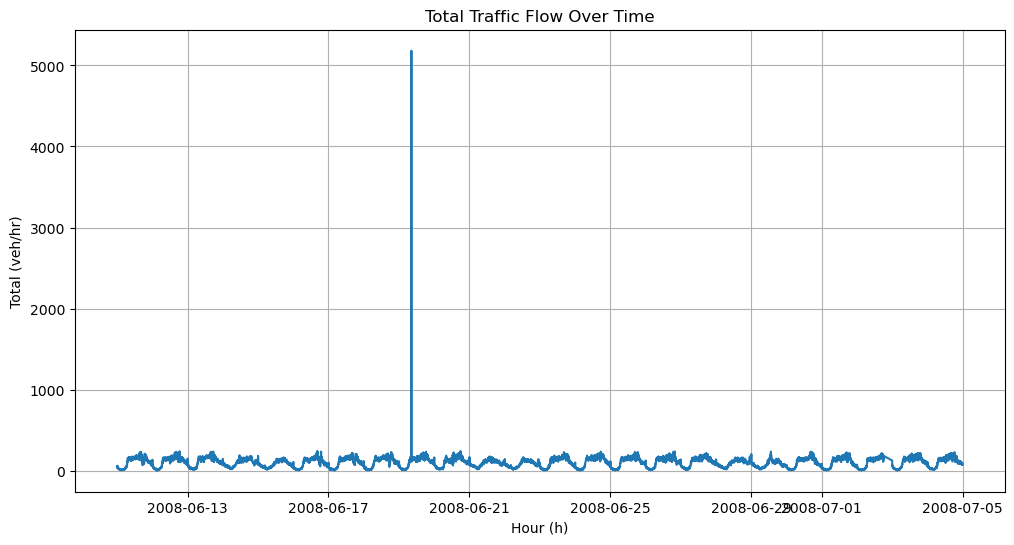

In [23]:
# Plot the data
plt.figure(figsize=(12, 6))
#plt.plot(hourly_df['Time'], hourly_df['Total'], linestyle='-')
plt.plot(df_1_shorted_hour.index, df_1_shorted_hour['Total'], linestyle='-')
plt.title('Total Traffic Flow Over Time')
plt.xlabel('Hour (h)')
plt.ylabel('Total (veh/hr)')
plt.grid(True)
plt.savefig(f'Total Traffic Flow Over Time.png')
plt.show()

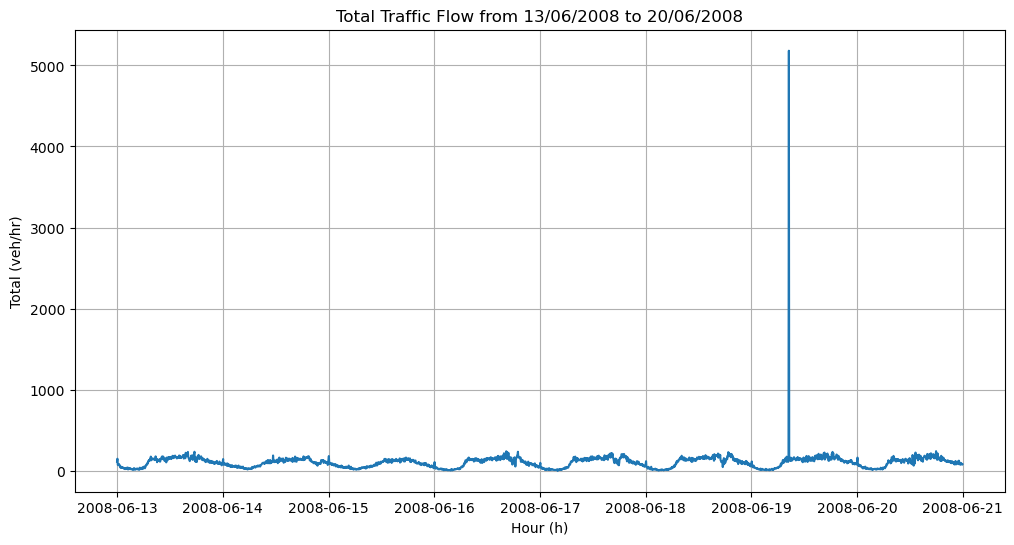

In [24]:
# Filter the data to include only the date range from 13/6/XX to 20/6/XX
start_date = '2008-06-13'  # Adjust the year as per your data, format YYYY-MM-DD
end_date = '2008-06-20'    # Adjust the year as per your data, format YYYY-MM-DD
df_1_filtered = df_1_shorted_hour.loc[start_date:end_date]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(df_1_filtered.index, df_1_filtered['Total'], linestyle='-')
plt.title('Total Traffic Flow from 13/06/2008 to 20/06/2008')
plt.xlabel('Hour (h)')
plt.ylabel('Total (veh/hr)')
plt.grid(True)
plt.savefig(f'Total_Traffic_Flow_13_to_20_June.png')
plt.show()

In [25]:
# Fix data error. There are a abnormal data point in the dataset. Turns out there's a data error in the data file: total vehicle on 19/6/2008 is 
# input as 5181. It should actually be 181. Make this correction.

# First, identify the incorrect data
incorrect_value = 5181
correct_value = 181
incorrect_date = '2008-06-19'

# Locate the row with the incorrect value on the specified date
df_1_shorted_hour.loc[(df_1_shorted_hour.index.date == pd.to_datetime(incorrect_date).date()) & (df_1_shorted_hour['Total'] == incorrect_value), 'Total'] = correct_value

df_1_filtered_corrected = df_1_shorted_hour.loc[start_date:end_date]

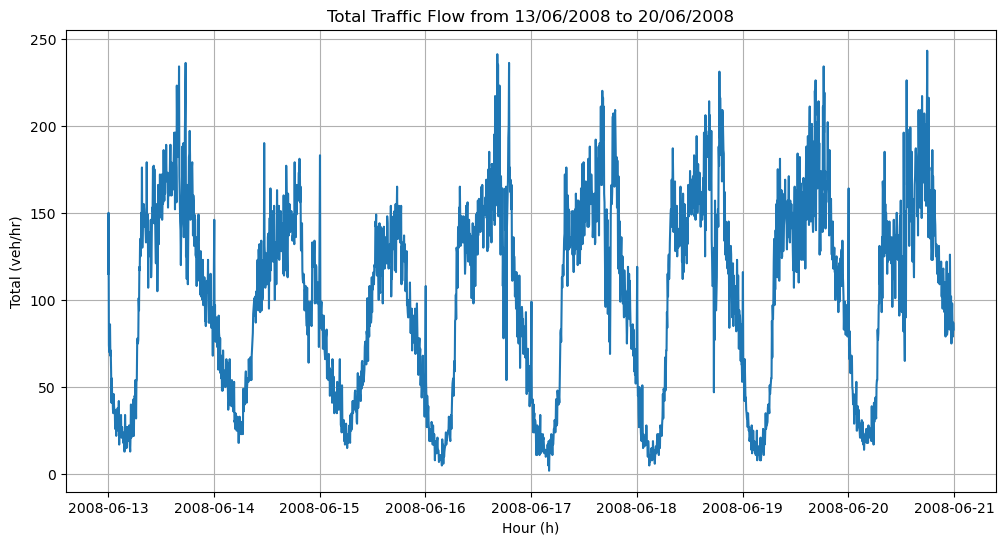

In [26]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_1_filtered.index, df_1_filtered_corrected['Total'], linestyle='-')
plt.title('Total Traffic Flow from 13/06/2008 to 20/06/2008')
plt.xlabel('Hour (h)')
plt.ylabel('Total (veh/hr)')
plt.grid(True)
plt.savefig(f'Corrected Total Traffic Flow Over Time.png')
plt.show()

In [31]:
# Load the CSV file into a DataFrame
file_path_2 = 'data_TrafficData.csv' 
df_2 = pd.read_csv(file_path_2) 

# Display the first few rows of the DataFrame to confirm the correct header is used
print(df_2.head())

    Time  Phase Time (s)  Density Lane 1  Vol/h Lane 1  Density Lane 2  \
0  00:00              85        0.017060    211.764706        0.030184   
1  00:01              85        0.014436    169.411765        0.020997   
2  00:02              85        0.014436    169.411765        0.031496   
3  00:04              87        0.019685    248.275862        0.038058   
4  00:05              84        0.011811    128.571429        0.024934   

   Vol/h Lane 2  Density Lane 3  Vol/h Lane 3  Density Lane 4  Vol/h Lane 4  \
0    338.823529        0.013123    169.411765        0.000000      0.000000   
1    211.764706        0.009186    127.058824        0.006562     84.705882   
2    338.823529        0.015748    211.764706        0.000000      0.000000   
3    413.793103        0.026247    331.034483        0.000000      0.000000   
4    257.142857        0.009186    128.571429        0.000000      0.000000   

   Average DS (%)  Unnamed: 11  Total density (veh/km)  Total flow (veh/hr)  
0 

In [33]:
# Select the last two columns, removing redundant columns
df_2_shorted = df_2[['Total density (veh/km)', 'Total flow (veh/hr)']]

# Display the new DataFrame
print(df_2_shorted)

     Total density (veh/km)  Total flow (veh/hr)
0                 60.367454           720.000000
1                 51.181102           592.941176
2                 61.679790           720.000000
3                 83.989501           993.103448
4                 45.931759           514.285714
..                      ...                  ...
799                0.000000             0.000000
800               76.115486           933.333333
801               82.677165          1016.470588
802               60.367454           720.000000
803               68.241470           762.352941

[804 rows x 2 columns]


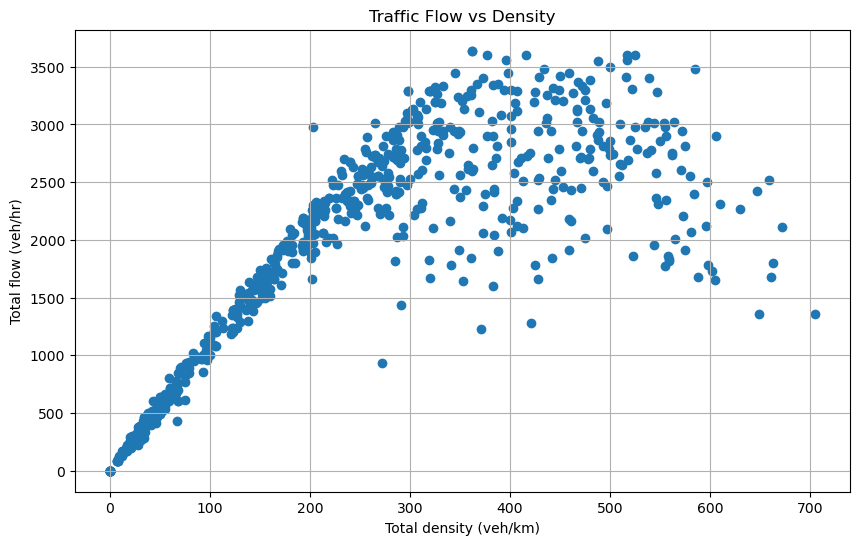

In [35]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_2_shorted['Total density (veh/km)'], df_2_shorted['Total flow (veh/hr)'], linestyle='-')
plt.title('Traffic Flow vs Density')
plt.xlabel('Total density (veh/km)')
plt.ylabel('Total flow (veh/hr)')
plt.grid(True)
plt.savefig(f'Traffic Flow vs Density.png')
plt.show()

In [37]:
# Find the index of the maximum value in 'Total flow (veh/hr)'
q_max = df_2_shorted['Total flow (veh/hr)'].max()
print("Maximum flow (q_max): ", q_max)
q_max_index = df_2_shorted['Total flow (veh/hr)'].idxmax()
# Find the corresponding value in 'Total density (veh/m/lane)'
k_max = df_2_shorted['Total density (veh/km)'].iloc[q_max_index]
# Display the results
print("The corresponding density to maximum flow (k_0)': ", k_max)

# Find the minimum value in 'Total flow (veh/hr)'
q_min = df_2_shorted['Total flow (veh/hr)'].min()
print("\nMinimum value in 'Total flow (veh/hr)': ", q_min)
# Find the index of the minimum value in 'Total flow (veh/hr)'
q_min_index = df_2_shorted['Total flow (veh/hr)'].idxmin()
# Find the corresponding value in 'Total density (veh/m/lane)'
k_0 = df_2_shorted['Total density (veh/km)'].iloc[q_min_index]
# Display the results
print("Corresponding value in 'Total density (veh/km)': ", k_0)

# Greenshield’s macroscopic stream model for calculations of free stream velocity ($v_f$) and density jam ($k_j$)
# 1, From q_max, get the corresponding k_max
# 2, Calculation of the jam density (k_j = k_0 * 2) 
k_j = k_max * 2
print('\nJam density (veh/km) (k_j = k_max * 2) = ', k_j)
# 3, Calculation of the free flow velocity 
v_f = q_max * 4 / k_j
print('\nFree speed (km/lane/h) (v_f = q_max * 4 / k_j) = ', v_f) 

Maximum flow (q_max):  3638.709677
The corresponding density to maximum flow (k_0)':  362.204724

Minimum value in 'Total flow (veh/hr)':  0.0
Corresponding value in 'Total density (veh/km)':  0.0

Jam density (veh/km) (k_j = k_max * 2) =  724.409448

Free speed (km/lane/h) (v_f = q_max * 4 / k_j) =  20.09200563049531


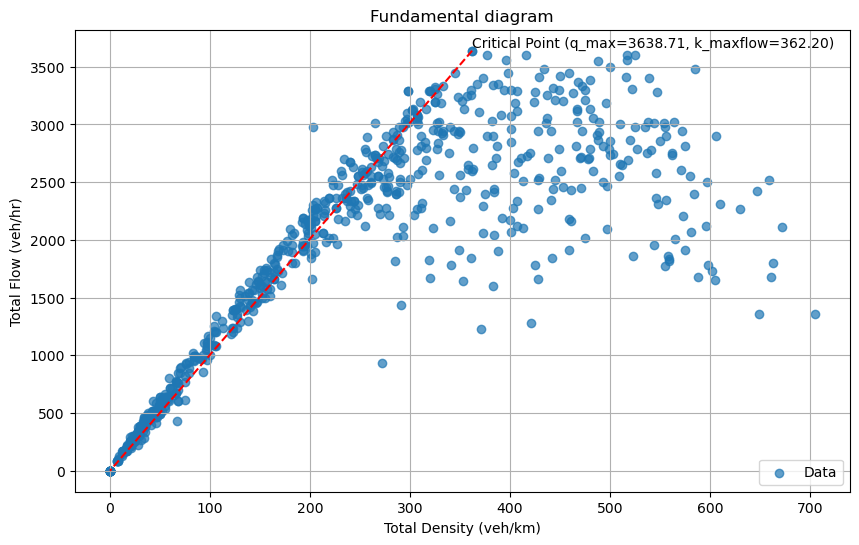

In [41]:
# Recreate scatter plot with slope lines
plt.figure(figsize=(10, 6))
plt.scatter(df_2_shorted['Total density (veh/km)'], df_2_shorted['Total flow (veh/hr)'], alpha=0.7, label='Data')
plt.plot([k_max, k_0], [q_max, q_min], color='red', linestyle='--')
plt.text(k_max, q_max, f"Critical Point (q_max={q_max:.2f}, k_maxflow={k_max:.2f})",
         horizontalalignment='left', verticalalignment='bottom')
# Add title and labels
plt.title('Fundamental diagram')
plt.xlabel('Total Density (veh/km)')
plt.ylabel('Total Flow (veh/hr)')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.savefig(f'Greenshield stream model.png')
plt.show()

## Part 2: Exchange document and discussion

Introduce yourself to your collaborator and tell them why you're here.

First, swap your method to do the given task with your partner and try to reproduce their work without talking to each other.
    
Then, talk to each other about challenges you faced (or didn't face) or why you were or weren't able to reproduce their woork.

# Discussion

- Do you need to use the same tools for analysing data and documents?  
- Were you successful in reproducing your partner's work? 
- What would happen if you got different results from your collaborator? 
- How to make it easy / hard for your partner reproducing your work? 
- What would have to happen if you had to use a new dataset, or you wanted to use other algorithm for analysis, how do you keep your partner updated? 
- What would have to happen if you caught further data errors and had to re-create the analysis with corrections, how do your partner know to avoid this? 
- What would have to happen if you had to revert to the original dataset?

# Four aspects of reproducibility:

Documentation: details of you code, model, algorithm, data, helps for running your code.

Organization: save data in clear structure, easily to double check and use, separate raw and processed data, save code in separate folder.

Automation: reduce audience effort to manipulate/edit your code to make it work, no effort is the best

Dissemination: your research journal, data, code, algorithm are reproducible. How to maintain these materials assessible?